# Steps:
### Import relavant libraries & modules

- **Basic EDA**
      - Missing Data
      - Duplicate Values
      - Outliers or Anomalies
      - Data Visualization
      - Feature Encoding
      - Feature Selection
  
- **Model Building**
      - Separate Independent & Dependent Data
      - Split your data into training & test set
      - Model Selection
      - Model Training
      - Model Prediction
      - Model Evalution

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

import xgboost
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [3]:
df = pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
df.shape

(5000, 7)

## Basic EDA

In [5]:
df.tail()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316
4999,65510.581804,5.992305,6.792336,4.07,46501.283803,1.298950e+06,"37778 George Ridges Apt. 509\nEast Holly, NV 2..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [7]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [8]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [9]:
df.nunique()

Avg. Area Income                5000
Avg. Area House Age             5000
Avg. Area Number of Rooms       5000
Avg. Area Number of Bedrooms     255
Area Population                 5000
Price                           5000
Address                         5000
dtype: int64

In [10]:
df['Avg. Area Number of Bedrooms']

0       4.09
1       3.09
2       5.13
3       3.26
4       4.23
        ... 
4995    3.46
4996    4.02
4997    2.13
4998    5.44
4999    4.07
Name: Avg. Area Number of Bedrooms, Length: 5000, dtype: float64

### Missing data

In [11]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

### Duplicate Data

In [12]:
df.duplicated().sum()

0

In [13]:
df[df.duplicated()]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address


### Outliers or Anomalies

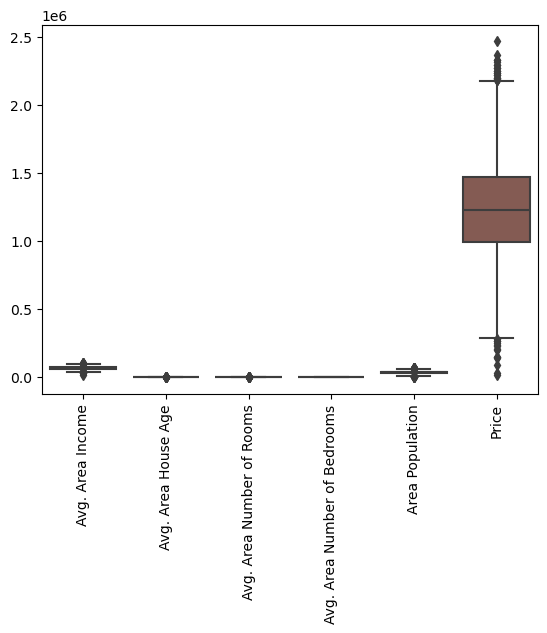

In [14]:
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

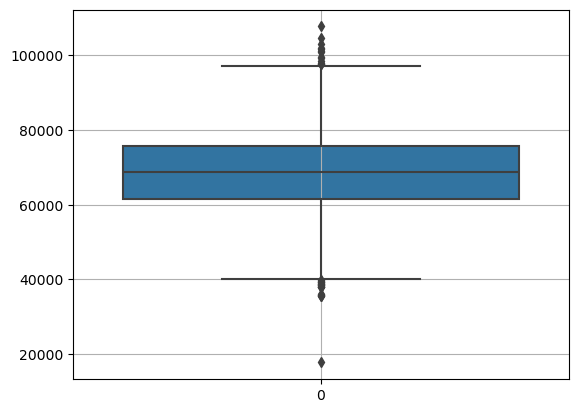

In [15]:
sns.boxplot(df['Avg. Area Income'],)
plt.grid()

In [16]:
df[(df['Avg. Area Income']>97000) | (df['Avg. Area Income']<40000)]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
12,39033.809237,7.671755,7.250029,3.10,39220.361467,1.042814e+06,"209 Natasha Stream Suite 961\nHuffmanland, NE ..."
39,17796.631190,4.949557,6.713905,2.50,47162.183643,3.023558e+05,"9932 Eric Circles\nLake Martha, WY 34611-6127"
411,36100.444227,5.778489,5.497450,2.29,44901.857338,5.995040e+05,"842 Duane Brook Apt. 380\nMonicaview, AR 01639..."
428,97112.361252,5.914725,6.133646,3.10,51470.067638,1.917584e+06,"35841 Christine Shore\nWallmouth, NC 98956-5357"
558,99629.013581,5.431863,7.351398,5.45,36950.739057,1.883481e+06,"PSC 0420, Box 6835\nAPO AE 08359"
693,107701.748378,7.143522,8.518608,3.29,37619.439929,2.332111e+06,"41017 Eric Village\nJonathanport, CO 37205"
844,39411.652788,4.385845,7.047435,4.44,45851.398296,5.394834e+05,"1085 Michele Glens Apt. 517\nSergiotown, VT 20367"
962,101928.858060,4.829586,9.039382,4.08,22804.991935,1.938866e+06,"856 Harris Centers Suite 940\nNicholasport, IL..."
1096,97548.310413,5.460973,6.609396,2.50,39089.415712,2.026303e+06,"349 Sean Forges\nWhitakerville, WY 85138-4153"
1271,37971.207566,4.291224,5.807510,3.24,33267.767728,3.114052e+04,"98398 Terrance Pines\nSouth Joshua, MT 00544-8919"


In [17]:
len(df[(df['Avg. Area Income']>97000) | (df['Avg. Area Income']<40000)])

34

In [18]:
df[(df['Avg. Area Income']>97000) | (df['Avg. Area Income']<40000)].index

Index([  12,   39,  411,  428,  558,  693,  844,  962, 1096, 1271, 1459, 1597,
       1734, 1891, 2025, 2092, 2242, 2300, 2597, 2719, 3069, 3144, 3183, 3483,
       3541, 3798, 3947, 4087, 4400, 4449, 4716, 4744, 4844, 4855],
      dtype='int64')

In [19]:
df.shape

(5000, 7)

In [20]:
df.drop(index=[12,   39,  411,  428,  558,  693,  844,  962, 1096, 1271, 1459, 1597,
       1734, 1891, 2025, 2092, 2242, 2300, 2597, 2719, 3069, 3144, 3183, 3483,
       3541, 3798, 3947, 4087, 4400, 4449, 4716, 4744, 4844, 4855],axis=0,inplace=True)

In [21]:
df.shape

(4966, 7)

### Feature Encoding or Droping

In [22]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [25]:
df['Address'].nunique()

4966

In [26]:
df['Address'].value_counts()

Address
208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101             1
89265 Robert Haven Apt. 492\nSmithburgh, FM 58565-1105           1
PSC 7034, Box 6131\nAPO AA 05662-4293                            1
21042 Wilson Islands Suite 238\nFischerchester, MP 42425-4129    1
Unit 8831 Box 5748\nDPO AE 73012-7314                            1
                                                                ..
054 Carter Crescent Suite 674\nGlennport, WA 11140               1
8460 Kathleen Mission Apt. 482\nPort Amytown, KY 72016           1
3737 Hartman Rue\nReneestad, ID 69250-7718                       1
3465 Latoya Well\nNelsonmouth, MI 55741-4287                     1
37778 George Ridges Apt. 509\nEast Holly, NV 29290-3595          1
Name: count, Length: 4966, dtype: int64

In [27]:
df.drop(columns=['Address'],axis=1,inplace=True)

In [28]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


### Feature Selection

In [30]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.006274,-0.012836,0.018610,-0.011947,0.629465
Avg. Area House Age,-0.006274,1.000000,-0.008912,0.005030,-0.018811,0.455607
Avg. Area Number of Rooms,-0.012836,-0.008912,1.000000,0.463133,0.004193,0.340249
Avg. Area Number of Bedrooms,0.018610,0.005030,0.463133,1.000000,-0.021517,0.171979
Area Population,-0.011947,-0.018811,0.004193,-0.021517,1.000000,0.414990
Price,0.629465,0.455607,0.340249,0.171979,0.414990,1.000000


In [31]:
df.corr()['Price']

Avg. Area Income                0.629465
Avg. Area House Age             0.455607
Avg. Area Number of Rooms       0.340249
Avg. Area Number of Bedrooms    0.171979
Area Population                 0.414990
Price                           1.000000
Name: Price, dtype: float64

## Model Building - Using Regression Algorithm

### Separate Independent & Dependent Data

In [33]:
x = df.iloc[:,:-1]
x

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [34]:
y = df['Price']
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 4966, dtype: float64

### Split your data into training & test set

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [36]:
x_train.shape

(3972, 5)

In [37]:
x_test.shape

(994, 5)

### Model Selection

#### Linear Regression

In [39]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [42]:
print(f'Training Accuracy : {lr.score(x_train,y_train)}')
print(f'Test Accuracy : {lr.score(x_test,y_test)}')

Training Accuracy : 0.9161466729297922
Test Accuracy : 0.9180015018430214


#### DecesionTree Regressor

In [65]:
dt = DecisionTreeRegressor(max_depth=9)
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=9)

In [66]:
print(f'Training Accuracy : {dt.score(x_train,y_train)}')
print(f'Test Accuracy : {dt.score(x_test,y_test)}')

Training Accuracy : 0.9231149743558122
Test Accuracy : 0.7775179732239009


#### Gradiant Boosting

In [129]:
gb = GradientBoostingRegressor(learning_rate=0.1,n_estimators=250,max_depth=4)
gb.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=250)

In [130]:
print(f'Training Accuracy : {gb.score(x_train,y_train)}')
print(f'Test Accuracy : {gb.score(x_test,y_test)}')

Training Accuracy : 0.9493817529966123
Test Accuracy : 0.9024236325872791


#### Adaboost

In [145]:
ad = AdaBoostRegressor(n_estimators=200,random_state=42,learning_rate=1.0)
ad.fit(x_train,y_train)

AdaBoostRegressor(n_estimators=200, random_state=42)

In [146]:
print(f'Training Accuracy : {ad.score(x_train,y_train)}')
print(f'Test Accuracy : {ad.score(x_test,y_test)}')

Training Accuracy : 0.8689839724876098
Test Accuracy : 0.8469853063293213


#### Random Forest

In [173]:
rf = RandomForestRegressor(n_estimators=200,oob_score=True)
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=200, oob_score=True)

In [174]:
print(f'Training Accuracy : {rf.score(x_train,y_train)}')
print(f'Test Accuracy : {rf.score(x_test,y_test)}')

Training Accuracy : 0.9839892251389176
Test Accuracy : 0.8853820808406564


#### XGboost

In [277]:
xgb = XGBRegressor(n_estimators=100,max_depth=5,learning_rate=0.1,reg_lambda=0.9)
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [278]:
print(f'Training Accuracy : {xgb.score(x_train,y_train)}')
print(f'Test Accuracy : {xgb.score(x_test,y_test)}')

Training Accuracy : 0.9444563178576828
Test Accuracy : 0.9007637889205866


### Model Training  

#### Best algorithm we find is linear regression

In [279]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

### Model Prediction

In [283]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [284]:
x_test[:3]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
3160,65803.600647,6.730870,7.063988,4.06,36011.051169
1978,61687.869796,5.418325,7.334992,3.48,34760.760268
1354,43952.336214,5.416065,7.327671,4.41,25139.449944


In [285]:
y_test[:3]

3160    1.306288e+06
1978    9.919341e+05
1354    3.249820e+05
Name: Price, dtype: float64

In [286]:
y_test_pred[:3]

array([1303635.20583776, 1009303.3377402 ,  480194.77194905])

In [287]:
x.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [288]:
lr.coef_

array([2.16406066e+01, 1.66104091e+05, 1.20673492e+05, 1.75557397e+03,
       1.51408551e+01])

In [289]:
pd.DataFrame(lr.coef_,index=x.columns,columns=['coefficients'])

,coefficients
Avg. Area Income,21.640607
Avg. Area House Age,166104.090506
Avg. Area Number of Rooms,120673.492264
Avg. Area Number of Bedrooms,1755.573974
Area Population,15.140855


### Model Evalution

In [294]:
def model_evaluation(actual, predicted):
    mse = mean_squared_error(actual,predicted)
    rmse = np.sqrt(mean_squared_error(actual,predicted))
    mae = mean_absolute_error(actual,predicted)
    r2s = r2_score(actual,predicted)

    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'r2_score: {r2s}')

In [295]:
# For Training Data

model_evaluation(y_train,y_train_pred)

Mean Squared Error: 10268623193.67436
Root Mean Squared Error: 101334.21531582686
Mean Absolute Error: 81605.20894176635
r2_score: 0.9161466729297922


In [296]:
# For Test Data

model_evaluation(y_test,y_test_pred)

Mean Squared Error: 9769360588.245794
Root Mean Squared Error: 98840.07582072058
Mean Absolute Error: 79388.31116422222
r2_score: 0.9180015018430214


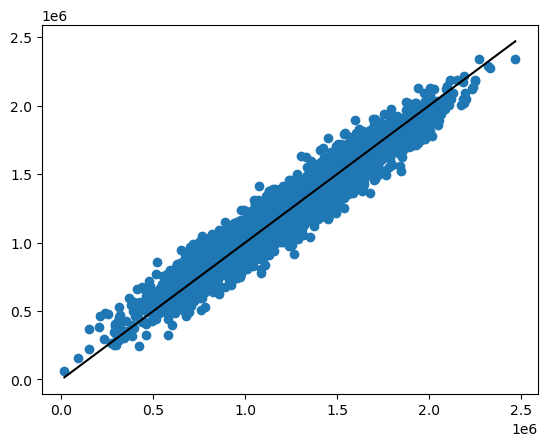

In [302]:
plt.scatter(y_train,y_train_pred)
plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()], 'k')